**<center><font size = "6">Hyperparameters Logistic Regression<center>**
***

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parámetros-por-defecto" data-toc-modified-id="Parámetros-por-defecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parámetros por defecto</a></span></li><li><span><a href="#Penalty-=-none" data-toc-modified-id="Penalty-=-none-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Penalty = none</a></span></li><li><span><a href="#Solver-=-newton-cg" data-toc-modified-id="Solver-=-newton-cg-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solver = newton-cg</a></span></li><li><span><a href="#Penalty-=-none,-solver-=-newton-cg" data-toc-modified-id="Penalty-=-none,-solver-=-newton-cg-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Penalty = none, solver = newton-cg</a></span></li><li><span><a href="#Penalty-=-l1,-solver-=-liblinear,-multi_class-=-ovr" data-toc-modified-id="Penalty-=-l1,-solver-=-liblinear,-multi_class-=-ovr-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Penalty = l1, solver = liblinear, multi_class = ovr</a></span></li><li><span><a href="#Dual-=-True,-solver-=-liblinear,-multi_class-=-ovr" data-toc-modified-id="Dual-=-True,-solver-=-liblinear,-multi_class-=-ovr-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dual = True, solver = liblinear, multi_class = ovr</a></span></li><li><span><a href="#Solver-=-sag" data-toc-modified-id="Solver-=-sag-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Solver = sag</a></span></li><li><span><a href="#Penalty-=-none,-solver-=-sag" data-toc-modified-id="Penalty-=-none,-solver-=-sag-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Penalty = none, solver = sag</a></span></li><li><span><a href="#Penalty-=-elasticnet,-solver-=-saga,-l1_ratio=0.5" data-toc-modified-id="Penalty-=-elasticnet,-solver-=-saga,-l1_ratio=0.5-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Penalty = elasticnet, solver = saga, l1_ratio=0.5</a></span></li><li><span><a href="#Penalty-=-l1,-solver-=-saga" data-toc-modified-id="Penalty-=-l1,-solver-=-saga-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Penalty = l1, solver = saga</a></span></li><li><span><a href="#Solver-=-saga" data-toc-modified-id="Solver-=-saga-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Solver = saga</a></span></li><li><span><a href="#Penalty-=-none" data-toc-modified-id="Penalty-=-none-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Penalty = none</a></span></li></ul></div>

***

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt
import numpy as np

# FORMATO DE PLOTS
plt.style.use('bmh')

X_train_smt = pickle.load(open("saved_feats/X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/X_test_c", "rb"))
y_train_smt = pickle.load(open("saved_feats/y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/y_test_c", "rb"))

## Parámetros por defecto

In [2]:
clf_logit = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None,
                               random_state=None, solver='lbfgs', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit.fit(X_train_smt, y_train_smt)
pred_logit = clf_logit.predict(X_test)
pred_prob_logit = clf_logit.predict_proba(X_test)

In [3]:
print('Predicted classes:', clf_logit.classes_)
print('Average accuracy :', np.mean(
    pred_logit == y_test)*100)
print('Train accuracy :', (clf_logit.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 83.04202305689847
Train accuracy : 93.37941505513825
Test accuracy : 83.04202305689847

 CONFUSION MATRIX
[[  16   39    5]
 [ 223 2215  145]
 [   9   35    2]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.27      0.10        60
     Estable       0.97      0.86      0.91      2583
        Sube       0.01      0.04      0.02        46

    accuracy                           0.83      2689
   macro avg       0.35      0.39      0.34      2689
weighted avg       0.93      0.83      0.88      2689



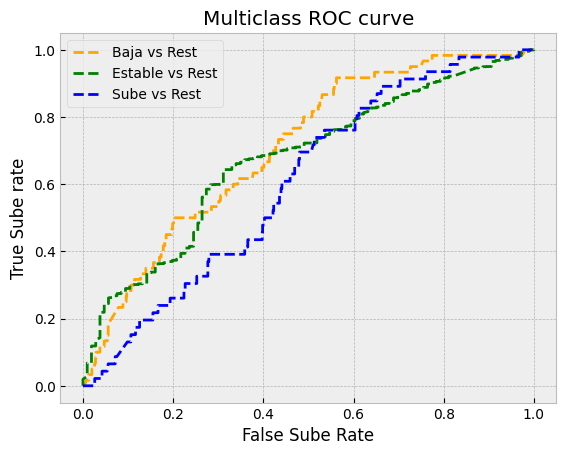

In [4]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty = none

In [5]:
clf_logit_2 = LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None,
                                 random_state=None, solver='lbfgs', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_2.fit(X_train_smt, y_train_smt)
pred_logit_2 = clf_logit_2.predict(X_test)
pred_prob_logit_2 = clf_logit_2.predict_proba(X_test)

C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print('Predicted classes:', clf_logit_2.classes_)
print('Average accuracy :', np.mean(
    pred_logit_2 == y_test)*100)
print('Train accuracy :', (clf_logit_2.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_2.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_2))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_2))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 87.05838601710673
Train accuracy : 96.61778807735337
Test accuracy : 87.05838601710673

 CONFUSION MATRIX
[[  10   46    4]
 [ 151 2329  103]
 [   5   39    2]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.17      0.09        60
     Estable       0.96      0.90      0.93      2583
        Sube       0.02      0.04      0.03        46

    accuracy                           0.87      2689
   macro avg       0.35      0.37      0.35      2689
weighted avg       0.93      0.87      0.90      2689



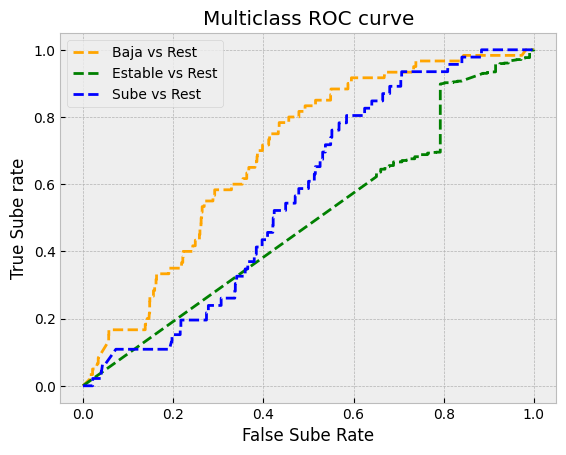

In [7]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_2[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_2[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_2[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Solver = newton-cg

In [8]:
clf_logit_3 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None,
                                 solver='newton-cg', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_3.fit(X_train_smt, y_train_smt)
pred_logit_3 = clf_logit_3.predict(X_test)
pred_prob_logit_3 = clf_logit_3.predict_proba(X_test)

In [9]:
print('Predicted classes:', clf_logit_3.classes_)
print('Average accuracy :', np.mean(
    pred_logit_3 == y_test)*100)
print('Train accuracy :', (clf_logit_3.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_3.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_3))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_3))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 83.04202305689847
Train accuracy : 93.37941505513825
Test accuracy : 83.04202305689847

 CONFUSION MATRIX
[[  16   39    5]
 [ 223 2215  145]
 [   9   35    2]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.27      0.10        60
     Estable       0.97      0.86      0.91      2583
        Sube       0.01      0.04      0.02        46

    accuracy                           0.83      2689
   macro avg       0.35      0.39      0.34      2689
weighted avg       0.93      0.83      0.88      2689



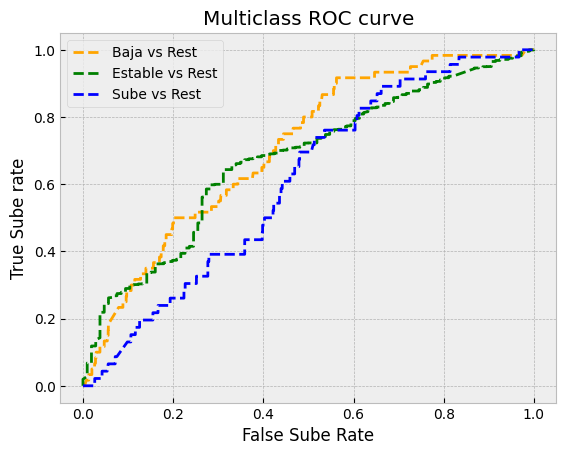

In [10]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_3[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_3[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_3[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty = none, solver = newton-cg

In [ ]:
clf_logit_4 = LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Baja': 0.2, 'Estable': 0.96, 'Sube': 0.2},
                                 random_state=None, solver='newton-cg', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_4.fit(X_train_smt, y_train_smt)
pred_logit_4 = clf_logit_4.predict(X_test)
pred_prob_logit_4 = clf_logit_4.predict_proba(X_test)

In [ ]:
print('Predicted classes:', clf_logit_4.classes_)
print('Average accuracy :', np.mean(
    pred_logit_4 == y_test)*100)
print('Train accuracy :', (clf_logit_4.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_4.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_4))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_4))

In [ ]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_4[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_4[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_4[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty = l1, solver = liblinear, multi_class = ovr

In [11]:
clf_logit_5 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                 random_state=None, solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_5.fit(X_train_smt, y_train_smt)
pred_logit_5 = clf_logit_5.predict(X_test)
pred_prob_logit_5 = clf_logit_5.predict_proba(X_test)

In [12]:
print('Predicted classes:', clf_logit_5.classes_)
print('Average accuracy :', np.mean(
    pred_logit_5 == y_test)*100)
print('Train accuracy :', (clf_logit_5.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_5.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_5))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_5))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 82.96764596504276
Train accuracy : 93.10372382931116
Test accuracy : 82.96764596504276

 CONFUSION MATRIX
[[  17   39    4]
 [ 236 2213  134]
 [  10   35    1]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.28      0.11        60
     Estable       0.97      0.86      0.91      2583
        Sube       0.01      0.02      0.01        46

    accuracy                           0.83      2689
   macro avg       0.35      0.39      0.34      2689
weighted avg       0.93      0.83      0.88      2689



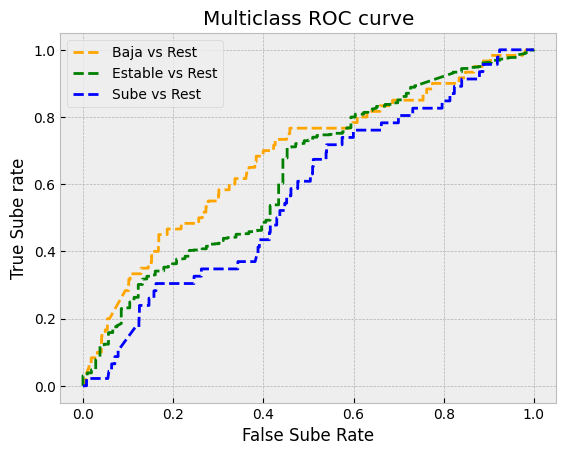

In [13]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_5[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_5[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_5[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Dual = True, solver = liblinear, multi_class = ovr

In [14]:
clf_logit_6 = LogisticRegression(penalty='l2', dual=True, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                 random_state=None, solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_6.fit(X_train_smt, y_train_smt)
pred_logit_6 = clf_logit_6.predict(X_test)
pred_prob_logit_6 = clf_logit_6.predict_proba(X_test)

In [15]:
print('Predicted classes:', clf_logit_6.classes_)
print('Average accuracy :', np.mean(
    pred_logit_6 == y_test)*100)
print('Train accuracy :', (clf_logit_6.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_6.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_6))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_6))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 81.9635552249907
Train accuracy : 92.74812210324437
Test accuracy : 81.9635552249907

 CONFUSION MATRIX
[[  16   39    5]
 [ 242 2185  156]
 [   9   34    3]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.27      0.10        60
     Estable       0.97      0.85      0.90      2583
        Sube       0.02      0.07      0.03        46

    accuracy                           0.82      2689
   macro avg       0.35      0.39      0.34      2689
weighted avg       0.93      0.82      0.87      2689



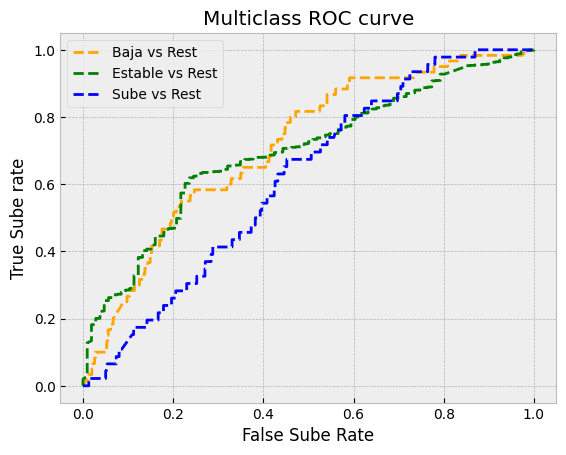

In [16]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_6[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_6[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_6[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Solver = sag

In [17]:
clf_logit_7 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                 random_state=None, solver='sag', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_7.fit(X_train_smt, y_train_smt)
pred_logit_7 = clf_logit_7.predict(X_test)
pred_prob_logit_7 = clf_logit_7.predict_proba(X_test)

In [18]:
print('Predicted classes:', clf_logit_7.classes_)
print('Average accuracy :', np.mean(
    pred_logit_7 == y_test)*100)
print('Train accuracy :', (clf_logit_7.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_7.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_7))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_7))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 81.9635552249907
Train accuracy : 92.75211762825634
Test accuracy : 81.9635552249907

 CONFUSION MATRIX
[[  16   39    5]
 [ 242 2185  156]
 [   9   34    3]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.27      0.10        60
     Estable       0.97      0.85      0.90      2583
        Sube       0.02      0.07      0.03        46

    accuracy                           0.82      2689
   macro avg       0.35      0.39      0.34      2689
weighted avg       0.93      0.82      0.87      2689



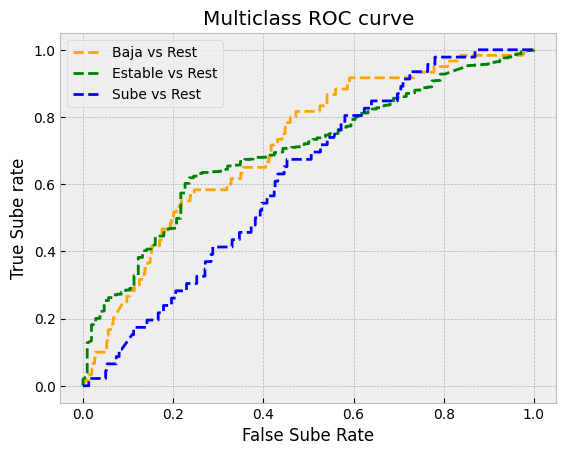

In [19]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_7[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_7[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_7[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty = none, solver = sag

In [20]:
clf_logit_8 = LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                 random_state=None, solver='sag', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_8.fit(X_train_smt, y_train_smt)
pred_logit_8 = clf_logit_8.predict(X_test)
pred_prob_logit_8 = clf_logit_8.predict_proba(X_test)

C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
print('Predicted classes:', clf_logit_8.classes_)
print('Average accuracy :', np.mean(
    pred_logit_8 == y_test)*100)
print('Train accuracy :', (clf_logit_8.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_8.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_8))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_8))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 85.01301599107475
Train accuracy : 96.14831388844493
Test accuracy : 85.01301599107475

 CONFUSION MATRIX
[[  12   42    6]
 [ 165 2273  145]
 [   6   39    1]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.07      0.20      0.10        60
     Estable       0.97      0.88      0.92      2583
        Sube       0.01      0.02      0.01        46

    accuracy                           0.85      2689
   macro avg       0.35      0.37      0.34      2689
weighted avg       0.93      0.85      0.89      2689



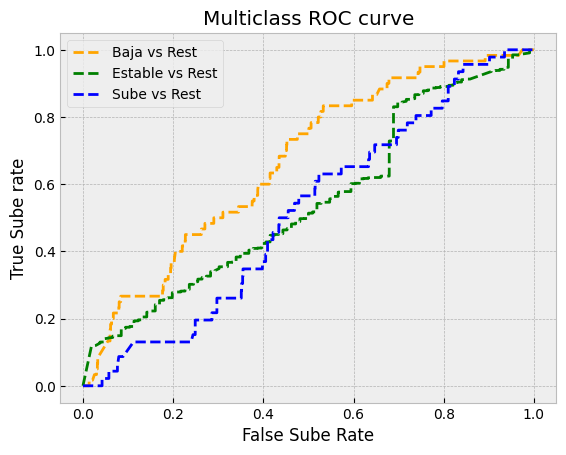

In [22]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_8[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_8[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_8[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty = elasticnet, solver = saga, l1_ratio=0.5

In [23]:
clf_logit_9 = LogisticRegression(penalty='elasticnet', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                 random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5)
clf_logit_9.fit(X_train_smt, y_train_smt)
pred_logit_9 = clf_logit_9.predict(X_test)
pred_prob_logit_9 = clf_logit_9.predict_proba(X_test)

In [24]:
print('Predicted classes:', clf_logit_9.classes_)
print('Average accuracy :', np.mean(
    pred_logit_9 == y_test)*100)
print('Train accuracy :', (clf_logit_9.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_9.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_9))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_9))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 81.85198958720714
Train accuracy : 92.49240850247723
Test accuracy : 81.85198958720714

 CONFUSION MATRIX
[[  16   38    6]
 [ 246 2182  155]
 [   9   34    3]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.27      0.10        60
     Estable       0.97      0.84      0.90      2583
        Sube       0.02      0.07      0.03        46

    accuracy                           0.82      2689
   macro avg       0.35      0.39      0.34      2689
weighted avg       0.93      0.82      0.87      2689



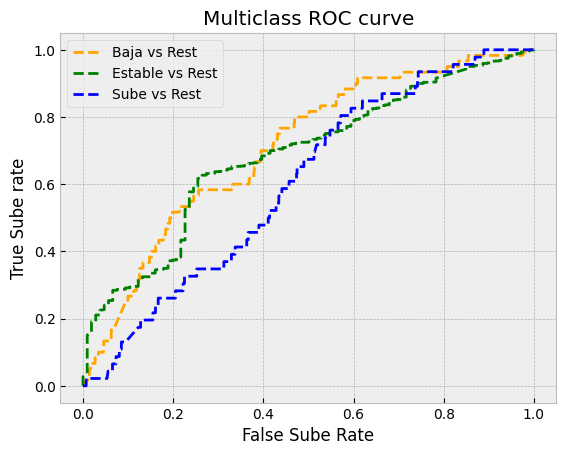

In [25]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_9[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_9[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_9[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty = l1, solver = saga

In [ ]:
clf_logit_10 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Baja': 0.2, 'Estable': 0.96, 'Sube': 0.2},
                                  random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_10.fit(X_train_smt, y_train_smt)
pred_logit_10 = clf_logit_10.predict(X_test)
pred_prob_logit_10 = clf_logit_10.predict_proba(X_test)

In [ ]:
print('Predicted classes:', clf_logit_10.classes_)
print('Average accuracy :', np.mean(
    pred_logit_10 == y_test)*100)
print('Train accuracy :', (clf_logit_10.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_10.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_10))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_10))

In [ ]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_10[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_10[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_10[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Solver = saga

In [26]:
clf_logit_11 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                  random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_11.fit(X_train_smt, y_train_smt)
pred_logit_11 = clf_logit_11.predict(X_test)
pred_prob_logit_11 = clf_logit_11.predict_proba(X_test)

In [27]:
print('Predicted classes:', clf_logit_11.classes_)
print('Average accuracy :', np.mean(
    pred_logit_11 == y_test)*100)
print('Train accuracy :', (clf_logit_11.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_11.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_11))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_11))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 81.9635552249907
Train accuracy : 92.74612434073838
Test accuracy : 81.9635552249907

 CONFUSION MATRIX
[[  16   39    5]
 [ 242 2185  156]
 [   9   34    3]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.27      0.10        60
     Estable       0.97      0.85      0.90      2583
        Sube       0.02      0.07      0.03        46

    accuracy                           0.82      2689
   macro avg       0.35      0.39      0.34      2689
weighted avg       0.93      0.82      0.87      2689



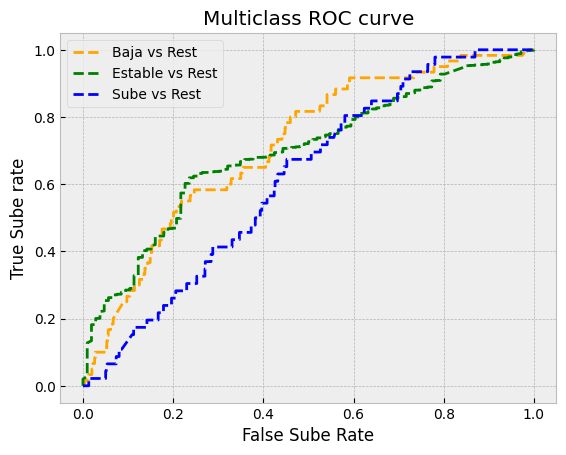

In [28]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_11[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_11[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_11[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty = none

In [ ]:
clf_logit_12 = LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Baja': 0.2, 'Estable': 0.96, 'Sube': 0.2},
                                  random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_12.fit(X_train_smt, y_train_smt)
pred_logit_12 = clf_logit_12.predict(X_test)
pred_prob_logit_12 = clf_logit_12.predict_proba(X_test)

C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print('Predicted classes:', clf_logit_12.classes_)
print('Average accuracy :', np.mean(
    pred_logit_12 == y_test)*100)
print('Train accuracy :', (clf_logit_12.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_12.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_12))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_12))

In [ ]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_12[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_12[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_12[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

# Grid Search

In [2]:
param_grid_logit = {'penalty': ['l1', 'l2'], 'C': [
    0.1, 1, 10, 100], 'solver': ['liblinear']}
grid_logit = GridSearchCV(LogisticRegression(class_weight=None),
                          param_grid_logit, verbose=2)
grid_logit.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.8s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.9s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.8s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.8s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.8s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   2.8s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   2.9s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   2.8s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   2.9s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   3.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   2.9s
[CV] END ..................C=1, penalty=l1, solve

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             verbose=2)

In [3]:
print("Mejor modelo predicho: " + str(grid_logit.best_estimator_))

Mejor modelo predicho: LogisticRegression(C=100, penalty='l1', solver='liblinear')


In [2]:
param_grid_logit = {
    'penalty': ['elasticnet'], 
    'C': [0.1, 1, 10, 100], 
    'solver': ['saga'],
    'l1_ratio': [0.5] 
}
grid_logit = GridSearchCV(LogisticRegression(class_weight=None), param_grid_logit, verbose=2)
grid_logit.fit(X_train_smt, y_train_smt)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 2.5min
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 2.4min
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 2.5min
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 2.7min
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 2.5min
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 4.6min
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 4.2min
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 4.4min
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 4.5min
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time= 4.3min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=19.6min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=19.6min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=19.7min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=19.8min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=19.9min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=22.8min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=23.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=22.9min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=23.1min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=23.1min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'l1_ratio': [0.5],
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             verbose=2)

In [3]:
print("Mejor modelo predicho: " + str(grid_logit.best_estimator_))

Mejor modelo predicho: LogisticRegression(C=100, l1_ratio=0.5, penalty='elasticnet', solver='saga')


In [4]:
param_grid_logit = {'penalty': ['l2'], 'C': [
    0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'sag']}
grid_logit = GridSearchCV(LogisticRegression(class_weight=None),
                          param_grid_logit, verbose=2)
grid_logit.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time= 2.0min
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time= 2.1min
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time= 2.0min
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time= 1.8min
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time= 2.0min
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time= 1.7min
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time= 1.5min
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time= 1.5min
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time= 1.3min
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time= 1.7min
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.7min
[CV] END ......................C=0.1, penalty=l2

C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time= 2.2min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time= 2.1min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time= 2.1min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time= 2.1min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time= 2.0min
[CV] END ........................C=1, penalty=l2, solver=sag; total time= 2.5min
[CV] END ........................C=1, penalty=l2, solver=sag; total time= 1.8min
[CV] END ........................C=1, penalty=l2, solver=sag; total time= 2.6min
[CV] END ........................C=1, penalty=l2, solver=sag; total time= 2.0min
[CV] END ........................C=1, penalty=l2, solver=sag; total time= 2.4min
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time= 7.2min
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time= 7.9min
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time= 7.6min
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time= 7.4min
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time= 6.6min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time= 2.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time= 2.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time= 2.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time= 2.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time= 2.0min
[CV] END .......................C=10, penalty=l2, solver=sag; total time= 3.4min
[CV] END .......................C=10, penalty=l2, solver=sag; total time= 3.5min
[CV] END .......................C=10, penalty=l2, solver=sag; total time= 3.4min
[CV] END .......................C=10, penalty=l2, solver=sag; total time= 3.4min
[CV] END .......................C=10, penalty=l2, solver=sag; total time= 3.4min
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=15.3min
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=14.5min
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=14.3min
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=13.9min
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=13.1min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time= 2.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time= 2.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time= 2.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time= 1.9min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time= 2.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 6.9min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 6.9min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 7.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 6.9min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 7.0min


C:\Dev\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             verbose=2)

In [5]:
print("Mejor modelo predicho: " + str(grid_logit.best_estimator_))

Mejor modelo predicho: LogisticRegression(C=100, solver='sag')
